## Does `EnergyModel` actually work for estimation?

The notebook runs a load of automated tests and gets the `EnergyModel` estimation of energy usage, then compares it with the values from energy.json.

In [1]:
from env import TestEnv
import pandas as pd
import json
import os
from conf import LisaLogging
from bart.common.Utils import area_under_curve
from trappy.plotter import plot_trace
from IPython.display import display
from trappy import ILinePlot
from trappy.stats.grammar import Parser
import pandas as pd

LisaLogging.setup()
import logging
logging.getLogger('Trace').setLevel(logging.WARNING)
logging.getLogger('Analysis').setLevel(logging.WARNING)
%matplotlib inline

2017-01-05 14:44:45,625 INFO    : root         : Using LISA logging configuration:
2017-01-05 14:44:45,625 INFO    : root         :   /home/brejac01/sources/lisa/logging.conf


In [2]:
import tests.eas.generic
from tests.eas.generic import EnergyModelTest

## Run all the tests
This will probalby take ages

In [3]:
# Disable drawing power from USB
!adb -s GA0113TP0180 shell "echo 'echo 0 > /sys/class/power_supply/battery/charging_enabled' | su"

error: device 'GA0113TP0180' not found


In [4]:
scs = EnergyModelTest.__subclasses__()

In [5]:
tests = []
all_experiments = []
measured_energy = []
est_energy = []

for cls in scs:
    cls.setUpClass()
    if not cls.te.emeter:
        raise Exception("This notebook won't work without an energy meter configured")
    t = cls()
    tests.append(t)
    for exp in t.executor.experiments:
        all_experiments.append(exp)
        json_path = os.path.join(exp.out_dir, "energy.json")
        with open(json_path) as f:
            energy = json.load(f)
        energy = sum(energy.values())
        measured_energy.append(energy)
                
        est_power = t.get_power_df(t.executor.experiments[0])['power']
        est_energy.append(area_under_curve(est_power))

2017-01-05 14:44:45,804 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:44:45,805 INFO    : TestEnv      : Using base path: /home/brejac01/sources/lisa
2017-01-05 14:44:45,806 INFO    : TestEnv      : Loading default (file) target configuration
2017-01-05 14:44:45,807 INFO    : TestEnv      : Loading target configuration [/home/brejac01/sources/lisa/target.config]...
2017-01-05 14:44:45,809 INFO    : TestEnv      : Loading custom (inline) test configuration
2017-01-05 14:44:45,810 INFO    : TestEnv      : Devlib modules to load: ['bl', u'cpuidle', 'cgroups', 'hwmon', 'cpufreq']
2017-01-05 14:44:45,811 INFO    : TestEnv      : Connecting linux target:
2017-01-05 14:44:45,812 INFO    : TestEnv      :   username : brendan
2017-01-05 14:44:45,812 INFO    : TestEnv      :       host : 192.168.2.2
2017-01-05 14:44:45,813 INFO    : TestEnv      :   password : password
2017-01-05 14:44:45,814 INFO    : TestEnv      : Connection settings:
2017-01-05 14:44:45,815 INFO    :

2017-01-05 14:45:42,890 INFO    : Workload     : Workload execution START:
2017-01-05 14:45:42,892 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/one_small_00.json 2>&1
2017-01-05 14:45:54,971 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:45:54,973 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:one_small/1/trace.dat
2017-01-05 14:45:54,974 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:45:54,975 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:one_small/1/trace_stat.json
2017-01-05 14:45:54,977 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:45:54,978 INFO    : Executor     : 
2017-01-05 14:45:54,980 INFO    : Executor     : ################################################################################
2017-01-05 14:45:54,981 INFO    : Executor     : Experiments execution completed
2017-0

Maximum estimated system energy: 1725


2017-01-05 14:45:56,252 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:45:56,253 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-05 14:45:56,254 INFO    : Executor     : 
2017-01-05 14:45:56,255 INFO    : Executor     : ################################################################################
2017-01-05 14:45:56,256 INFO    : Executor     : Experiments configuration
2017-01-05 14:45:56,257 INFO    : Executor     : ################################################################################
2017-01-05 14:45:56,258 INFO    : Executor     : Configured to run:
2017-01-05 14:45:56,260 INFO    : Executor     :      1 target configurations:
2017-01-05 14:45:56,261 INFO    : Executor     :       energy_aware
2017-01-05 14:45:56,262 INFO    : Executor     :      1 workloads (1 iterations each)
2017-01-05 14:45:56,264 INFO    : Executor     :       three_small
2017-01-05 14:45:56,265 INFO    : Executor     : Total: 1 experiments
2017

Maximum estimated system energy: 1725


2017-01-05 14:45:57,673 INFO    : LisaTest     : Experiments execution...
2017-01-05 14:45:57,674 INFO    : Executor     : 
2017-01-05 14:45:57,676 INFO    : Executor     : ################################################################################
2017-01-05 14:45:57,677 INFO    : Executor     : Experiments execution
2017-01-05 14:45:57,679 INFO    : Executor     : ################################################################################
2017-01-05 14:45:57,681 INFO    : Executor     : 
2017-01-05 14:45:57,682 INFO    : Executor     : ================================================================================
2017-01-05 14:45:57,684 INFO    : Executor     : configuring target for [energy_aware] experiments
2017-01-05 14:45:59,400 INFO    : Executor     : Set scheduler feature: ENERGY_AWARE
2017-01-05 14:46:00,305 WARNING : Executor     : cpufreq governor not specified, using currently configured governor
2017-01-05 14:46:00,306 INFO    : Workload     : Setup new workl

2017-01-05 14:46:10,096 INFO    : Workload     : Workload execution START:
2017-01-05 14:46:10,098 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/three_small_00.json 2>&1
2017-01-05 14:46:22,491 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:46:22,493 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:three_small/1/trace.dat
2017-01-05 14:46:22,494 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:46:22,496 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:three_small/1/trace_stat.json
2017-01-05 14:46:22,497 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:46:22,499 INFO    : Executor     : 
2017-01-05 14:46:22,501 INFO    : Executor     : ################################################################################
2017-01-05 14:46:22,502 INFO    : Executor     : Experiments execution completed


Maximum estimated system energy: 1725


2017-01-05 14:46:24,425 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:46:24,426 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-05 14:46:24,427 INFO    : Executor     : 
2017-01-05 14:46:24,427 INFO    : Executor     : ################################################################################
2017-01-05 14:46:24,428 INFO    : Executor     : Experiments configuration
2017-01-05 14:46:24,429 INFO    : Executor     : ################################################################################
2017-01-05 14:46:24,430 INFO    : Executor     : Configured to run:
2017-01-05 14:46:24,430 INFO    : Executor     :      1 target configurations:
2017-01-05 14:46:24,431 INFO    : Executor     :       energy_aware
2017-01-05 14:46:24,432 INFO    : Executor     :      1 workloads (1 iterations each)
2017-01-05 14:46:24,433 INFO    : Executor     :       two_big
2017-01-05 14:46:24,434 INFO    : Executor     : Total: 1 experiments
2017-01-

Maximum estimated system energy: 1725


2017-01-05 14:46:25,840 INFO    : LisaTest     : Experiments execution...
2017-01-05 14:46:25,841 INFO    : Executor     : 
2017-01-05 14:46:25,843 INFO    : Executor     : ################################################################################
2017-01-05 14:46:25,844 INFO    : Executor     : Experiments execution
2017-01-05 14:46:25,846 INFO    : Executor     : ################################################################################
2017-01-05 14:46:25,847 INFO    : Executor     : 
2017-01-05 14:46:25,848 INFO    : Executor     : ================================================================================
2017-01-05 14:46:25,849 INFO    : Executor     : configuring target for [energy_aware] experiments
2017-01-05 14:46:27,564 INFO    : Executor     : Set scheduler feature: ENERGY_AWARE
2017-01-05 14:46:28,469 WARNING : Executor     : cpufreq governor not specified, using currently configured governor
2017-01-05 14:46:28,471 INFO    : Workload     : Setup new workl

2017-01-05 14:46:38,325 INFO    : Workload     : Workload execution START:
2017-01-05 14:46:38,326 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/two_big_00.json 2>&1
2017-01-05 14:46:50,587 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:46:50,589 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:two_big/1/trace.dat
2017-01-05 14:46:50,590 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:46:50,592 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:two_big/1/trace_stat.json
2017-01-05 14:46:50,593 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:46:50,594 INFO    : Executor     : 
2017-01-05 14:46:50,595 INFO    : Executor     : ################################################################################
2017-01-05 14:46:50,596 INFO    : Executor     : Experiments execution completed
2017-01-05 1

Maximum estimated system energy: 1725


2017-01-05 14:46:52,181 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:46:52,182 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-05 14:46:52,182 INFO    : Executor     : 
2017-01-05 14:46:52,183 INFO    : Executor     : ################################################################################
2017-01-05 14:46:52,184 INFO    : Executor     : Experiments configuration
2017-01-05 14:46:52,185 INFO    : Executor     : ################################################################################
2017-01-05 14:46:52,186 INFO    : Executor     : Configured to run:
2017-01-05 14:46:52,186 INFO    : Executor     :      1 target configurations:
2017-01-05 14:46:52,187 INFO    : Executor     :       energy_aware
2017-01-05 14:46:52,188 INFO    : Executor     :      1 workloads (1 iterations each)
2017-01-05 14:46:52,189 INFO    : Executor     :       two_big_three_small
2017-01-05 14:46:52,190 INFO    : Executor     : Total: 1 experime

Maximum estimated system energy: 1725


2017-01-05 14:46:53,596 INFO    : LisaTest     : Experiments execution...
2017-01-05 14:46:53,597 INFO    : Executor     : 
2017-01-05 14:46:53,598 INFO    : Executor     : ################################################################################
2017-01-05 14:46:53,599 INFO    : Executor     : Experiments execution
2017-01-05 14:46:53,600 INFO    : Executor     : ################################################################################
2017-01-05 14:46:53,601 INFO    : Executor     : 
2017-01-05 14:46:53,602 INFO    : Executor     : ================================================================================
2017-01-05 14:46:53,603 INFO    : Executor     : configuring target for [energy_aware] experiments
2017-01-05 14:46:55,320 INFO    : Executor     : Set scheduler feature: ENERGY_AWARE
2017-01-05 14:46:56,225 WARNING : Executor     : cpufreq governor not specified, using currently configured governor
2017-01-05 14:46:56,227 INFO    : Workload     : Setup new workl

2017-01-05 14:47:06,040 INFO    : Workload     : Workload execution START:
2017-01-05 14:47:06,042 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/two_big_three_small_00.json 2>&1
2017-01-05 14:47:19,039 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:47:19,041 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:two_big_three_small/1/trace.dat
2017-01-05 14:47:19,042 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:47:19,043 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:two_big_three_small/1/trace_stat.json
2017-01-05 14:47:19,044 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:47:19,045 INFO    : Executor     : 
2017-01-05 14:47:19,047 INFO    : Executor     : ################################################################################
2017-01-05 14:47:19,048 INFO    : Executor     : Experime

Maximum estimated system energy: 1725
Maximum estimated system energy: 1725


2017-01-05 14:47:21,732 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:47:21,733 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-05 14:47:21,734 INFO    : Executor     : 
2017-01-05 14:47:21,735 INFO    : Executor     : ################################################################################
2017-01-05 14:47:21,736 INFO    : Executor     : Experiments configuration
2017-01-05 14:47:21,737 INFO    : Executor     : ################################################################################
2017-01-05 14:47:21,738 INFO    : Executor     : Configured to run:
2017-01-05 14:47:21,738 INFO    : Executor     :      1 target configurations:
2017-01-05 14:47:21,739 INFO    : Executor     :       energy_aware
2017-01-05 14:47:21,740 INFO    : Executor     :      1 workloads (1 iterations each)
2017-01-05 14:47:21,741 INFO    : Executor     :       ramp_up
2017-01-05 14:47:21,741 INFO    : Executor     : Total: 1 experiments
2017-01-

2017-01-05 14:47:35,606 INFO    : Workload     : Workload execution START:
2017-01-05 14:47:35,608 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/ramp_up_00.json 2>&1
2017-01-05 14:47:52,059 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:47:52,061 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:ramp_up/1/trace.dat
2017-01-05 14:47:52,063 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:47:52,064 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:ramp_up/1/trace_stat.json
2017-01-05 14:47:52,065 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:47:52,066 INFO    : Executor     : 
2017-01-05 14:47:52,067 INFO    : Executor     : ################################################################################
2017-01-05 14:47:52,068 INFO    : Executor     : Experiments execution completed
2017-01-05 1

Maximum estimated system energy: 1725


2017-01-05 14:47:53,471 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:47:53,472 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-05 14:47:53,473 INFO    : Executor     : 
2017-01-05 14:47:53,474 INFO    : Executor     : ################################################################################
2017-01-05 14:47:53,475 INFO    : Executor     : Experiments configuration
2017-01-05 14:47:53,476 INFO    : Executor     : ################################################################################
2017-01-05 14:47:53,476 INFO    : Executor     : Configured to run:
2017-01-05 14:47:53,477 INFO    : Executor     :      1 target configurations:
2017-01-05 14:47:53,478 INFO    : Executor     :       energy_aware
2017-01-05 14:47:53,479 INFO    : Executor     :      1 workloads (1 iterations each)
2017-01-05 14:47:53,480 INFO    : Executor     :       ramp_down
2017-01-05 14:47:53,480 INFO    : Executor     : Total: 1 experiments
2017-0

Maximum estimated system energy: 1725


2017-01-05 14:47:54,887 INFO    : LisaTest     : Experiments execution...
2017-01-05 14:47:54,888 INFO    : Executor     : 
2017-01-05 14:47:54,889 INFO    : Executor     : ################################################################################
2017-01-05 14:47:54,890 INFO    : Executor     : Experiments execution
2017-01-05 14:47:54,891 INFO    : Executor     : ################################################################################
2017-01-05 14:47:54,892 INFO    : Executor     : 
2017-01-05 14:47:54,893 INFO    : Executor     : ================================================================================
2017-01-05 14:47:54,894 INFO    : Executor     : configuring target for [energy_aware] experiments
2017-01-05 14:47:56,610 INFO    : Executor     : Set scheduler feature: ENERGY_AWARE
2017-01-05 14:47:57,515 WARNING : Executor     : cpufreq governor not specified, using currently configured governor
2017-01-05 14:47:57,517 INFO    : Workload     : Setup new workl

2017-01-05 14:48:07,345 INFO    : Workload     : Workload execution START:
2017-01-05 14:48:07,347 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/ramp_down_00.json 2>&1
2017-01-05 14:48:21,448 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:48:21,450 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:ramp_down/1/trace.dat
2017-01-05 14:48:21,451 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:48:21,453 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:ramp_down/1/trace_stat.json
2017-01-05 14:48:21,454 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:48:21,455 INFO    : Executor     : 
2017-01-05 14:48:21,456 INFO    : Executor     : ################################################################################
2017-01-05 14:48:21,457 INFO    : Executor     : Experiments execution completed
2017-0

Maximum estimated system energy: 1725


2017-01-05 14:48:22,803 INFO    : LisaTest     : Setup tests execution engine...
2017-01-05 14:48:22,804 INFO    : Executor     : Loading custom (inline) test configuration
2017-01-05 14:48:22,805 INFO    : Executor     : 
2017-01-05 14:48:22,807 INFO    : Executor     : ################################################################################
2017-01-05 14:48:22,808 INFO    : Executor     : Experiments configuration
2017-01-05 14:48:22,809 INFO    : Executor     : ################################################################################
2017-01-05 14:48:22,810 INFO    : Executor     : Configured to run:
2017-01-05 14:48:22,811 INFO    : Executor     :      1 target configurations:
2017-01-05 14:48:22,813 INFO    : Executor     :       energy_aware
2017-01-05 14:48:22,814 INFO    : Executor     :      1 workloads (1 iterations each)
2017-01-05 14:48:22,815 INFO    : Executor     :       wake_migration
2017-01-05 14:48:22,816 INFO    : Executor     : Total: 1 experiments
2

Maximum estimated system energy: 1725


2017-01-05 14:48:24,224 INFO    : LisaTest     : Experiments execution...
2017-01-05 14:48:24,226 INFO    : Executor     : 
2017-01-05 14:48:24,227 INFO    : Executor     : ################################################################################
2017-01-05 14:48:24,229 INFO    : Executor     : Experiments execution
2017-01-05 14:48:24,230 INFO    : Executor     : ################################################################################
2017-01-05 14:48:24,232 INFO    : Executor     : 
2017-01-05 14:48:24,234 INFO    : Executor     : ================================================================================
2017-01-05 14:48:24,235 INFO    : Executor     : configuring target for [energy_aware] experiments
2017-01-05 14:48:25,952 INFO    : Executor     : Set scheduler feature: ENERGY_AWARE
2017-01-05 14:48:26,857 WARNING : Executor     : cpufreq governor not specified, using currently configured governor
2017-01-05 14:48:26,859 INFO    : Workload     : Setup new workl

2017-01-05 14:48:36,699 INFO    : Workload     : Workload execution START:
2017-01-05 14:48:36,701 INFO    : Workload     :    /home/brendan/devlib-target/bin/rt-app /home/brendan/devlib-target/run_dir/wake_migration_00.json 2>&1
2017-01-05 14:48:47,995 INFO    : Executor     : Collected FTrace binary trace:
2017-01-05 14:48:47,997 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:wake_migration/1/trace.dat
2017-01-05 14:48:47,998 INFO    : Executor     : Collected FTrace function profiling:
2017-01-05 14:48:48,000 INFO    : Executor     :    <res_dir>/rtapp:energy_aware:wake_migration/1/trace_stat.json
2017-01-05 14:48:48,001 INFO    : Executor     : --------------------------------------------------------------------------------
2017-01-05 14:48:48,002 INFO    : Executor     : 
2017-01-05 14:48:48,003 INFO    : Executor     : ################################################################################
2017-01-05 14:48:48,004 INFO    : Executor     : Experiments execution c

Maximum estimated system energy: 1725
Maximum estimated system energy: 1725


# Compare `EnergyModel` estimation with measured value

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


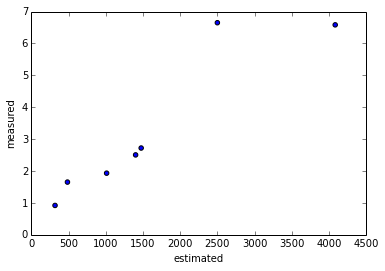

In [6]:
df = pd.DataFrame({'measured': measured_energy, 'estimated': est_energy}, columns=['measured', 'estimated'])
df.plot.scatter(x='estimated', y='measured')

In [7]:
tests

[<tests.eas.generic.OneSmallTask testMethod=runTest>,
 <tests.eas.generic.ThreeSmallTasks testMethod=runTest>,
 <tests.eas.generic.TwoBigTasks testMethod=runTest>,
 <tests.eas.generic.TwoBigThreeSmall testMethod=runTest>,
 <tests.eas.generic.RampUp testMethod=runTest>,
 <tests.eas.generic.RampDown testMethod=runTest>,
 <tests.eas.generic.EnergyModelWakeMigration testMethod=runTest>]

## Show results

Now we'll plot:

- Task residency
- CPU frequency (if available)
- Energy recorded by energy meter (if available)
- Energy estimated:
  - By `sched_group_energy` in the kernel (using the `sched_energy_diff` trace event)
  - By `EnergyModel`, according to the ideal utilization values that would be expected for the observed task placement
  - By `EnergyMOdel`, according to the utilization values extracted via the `sched_load_avg_cpu` event

In [22]:
def examine(test, experiment_idx=0):
    ex = test.executor.experiments[experiment_idx]
    
    # Show task residency
    trace = test.get_trace(ex)
    plot_trace(trace.ftrace)
    
    if 'cpu_frequency' in trace.available_events:
        print "CPU FREQ:"
        p = Parser(trace.ftrace)
        freq_df = p.solve('cpu_frequency:frequency')
        ILinePlot(freq_df, drawstyle='steps-post').view()
    
    csv_path = os.path.join(ex.out_dir, "samples_Device0.csv")
    if os.path.exists(csv_path):
        print "RECORDED ENERGY:"
        # Show recorded energy
        samples_df = pd.read_csv(csv_path, sep=", ", engine='python', index_col='"timestamp ms"')
        samples_df.index.name='time'
        samples_df.index /= 1000
        samples_df = samples_df[['"power mW"']]
        samples_df.columns = ['power']
        ILinePlot(samples_df, column='power').view()

    print "ESTIMATED ENERGY:"
    # Show estimated energy
    est_placement_df = test.get_power_df(ex)

    df = trace.ftrace.sched_energy_diff.data_frame
    display(df)
    # TODO: This is a hack to get only sched_energy_diff estimations where the 
    # potential migration was between clusters, i.e. both top-level sched_groups were considered.
    # Instead of hard-coding this we should detect that case using data in the EnergyModel.
    sched_df = df[df['src_cpu'].isin((1, 2)) != df['dst_cpu'].isin((1, 2))]

    p = Parser(trace.ftrace)
    util_df = p.solve('sched_load_avg_cpu:util_avg').fillna(0)
    def f(row):
        return t.te.nrg_model.estimate_from_cpu_util(row.tolist())['power']
    est_util_df = util_df.apply(f, axis=1)

    df = pd.concat([sched_df['nrg_before'], est_util_df, est_placement_df['power']], axis=1)
    df = df.sort_index().fillna(method='ffill')
    df.columns = ['sched_group_energy', 'EnergyModel (sched_load_avg_task)', 'EnergyModel (placement)']
    ILinePlot([df], column=df.columns.tolist(), drawstyle='steps-before').view()
    
examine(tests[0])

Maximum estimated system energy: 1725


ESTIMATED ENERGY:
Maximum estimated system energy: 1725


,__comm,__cpu,__pid,cap_after,cap_before,cap_delta,comm,dst_cpu,nrg_after,nrg_before,nrg_delta,nrg_diff,nrg_payoff,pid,src_cpu,usage_delta,nrg_diff_pct,usage_delta_group,nrg_payoff_group
Time,,,,,,,,,,,,,,,,,,,
0.000000,trace-cmd,5,16602,1023,417,606,sh,2,672,24,0,648,0,16601,1,1011,384.667826,>= 600,SchedTune Reject
0.000348,sh,1,16601,1023,417,606,sudo,1,638,80,0,558,0,16599,2,955,331.241739,>= 600,SchedTune Reject
0.001052,in:imuxsock,5,260,235,235,0,rs:main Q:Reg,5,59,59,0,0,0,262,4,1,0.000000,< 150,SchedTune Reject
0.001752,kworker/u12:0,5,16394,235,235,0,sshd,5,64,65,0,-1,0,16392,0,13,-0.593623,< 150,SchedTune Reject
0.153789,sshd,0,16392,0,235,-470,kworker/u12:0,0,59,59,0,0,0,16394,5,0,0.000000,< 150,SchedTune Reject
0.153899,kworker/u12:0,5,16394,235,417,-182,bash,5,123,125,0,-2,0,16395,2,5,-1.187246,< 150,SchedTune Reject
0.153998,kworker/u12:0,5,16394,235,235,0,sshd,5,58,58,0,0,0,16392,0,1,0.000000,< 150,SchedTune Reject
0.154046,bash,5,16395,0,235,-470,kworker/u12:0,0,58,58,0,0,0,16394,5,0,0.000000,< 150,SchedTune Reject
0.154099,bash,5,16395,0,235,-470,kworker/u12:0,0,63,63,0,0,0,16394,5,0,0.000000,< 150,SchedTune Reject


""
""


In [11]:
df.corr()

,sched_group_energy,EnergyModel
sched_group_energy,1.000000,-0.235161
EnergyModel,-0.235161,1.000000
